In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cares = pd.read_csv("../data/CARES_encoded_ignorecols.csv")
cares

,GENDER,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,AnaestypeCategory,PriorityCategory,AGEcategory,Mortality,thirtydaymortality,SurgRiskCategory,...,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay,Perioperativetransfusionwithin30days
0,0,1.0,1,NaN,0,0,2,0,0,0,...,0,0,0.0,0.0,0.0,0,1,0,0,0
1,1,2.0,1,NaN,0,0,3,0,0,1,...,0,0,0.0,0.0,0.0,0,1,0,0,1
2,1,1.0,0,59.0,0,0,3,1,0,0,...,0,0,0.0,1.0,1.0,0,1,0,0,0
3,1,0.0,1,NaN,0,1,2,0,0,0,...,0,0,0.0,0.0,0.0,0,0,1,0,0
4,0,0.0,0,NaN,0,0,1,0,0,1,...,0,0,1.0,0.0,1.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69662,1,0.0,0,NaN,0,0,2,0,0,0,...,0,0,1.0,0.0,1.0,0,0,0,0,0
69663,0,0.0,0,NaN,0,0,4,0,0,0,...,0,0,2.0,0.0,1.0,0,0,0,0,0
69664,0,1.0,0,NaN,0,0,3,0,0,1,...,1,0,2.0,0.0,1.0,0,0,0,0,0
69665,1,2.0,1,NaN,0,1,2,0,0,0,...,1,0,0.0,0.0,1.0,0,0,0,0,0


In [3]:
cares.columns

Index(['GENDER', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'AnaestypeCategory', 'PriorityCategory',
       'AGEcategory', 'Mortality', 'thirtydaymortality', 'SurgRiskCategory',
       'CVARCRICategory', 'IHDRCRICategory', 'CHFRCRICategory',
       'DMinsulinRCRICategory', 'CreatinineRCRICategory',
       'GradeofKidneyCategory', 'RDW15.7', 'ASAcategorybinned', 'ICUAdmgt24h',
       'Chinese', 'Indian', 'Malay', 'Perioperativetransfusionwithin30days'],
      dtype='object')

In [4]:
len(cares.columns)

23

In [5]:
cares.dtypes

GENDER                                    int64
Anemia category                         float64
PreopEGFRMDRD                             int64
DaysbetweenDeathandoperation            float64
AnaestypeCategory                         int64
PriorityCategory                          int64
AGEcategory                               int64
Mortality                                 int64
thirtydaymortality                        int64
SurgRiskCategory                          int64
CVARCRICategory                           int64
IHDRCRICategory                           int64
CHFRCRICategory                           int64
DMinsulinRCRICategory                     int64
CreatinineRCRICategory                    int64
GradeofKidneyCategory                   float64
RDW15.7                                 float64
ASAcategorybinned                       float64
ICUAdmgt24h                               int64
Chinese                                   int64
Indian                                  

In [6]:
RANDOM_SEED = 42

In [7]:
np.random.seed(RANDOM_SEED)

In [8]:
from sklearn.model_selection import train_test_split

# Mortality

In [11]:
feature_columns = [
    'GENDER',
    'Anemia category',
    'PreopEGFRMDRD',
    'AnaestypeCategory',
    'PriorityCategory',
    'AGEcategory',
    'SurgRiskCategory',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'CreatinineRCRICategory',
    'GradeofKidneyCategory',
    'RDW15.7',
    'ASAcategorybinned',
    'Chinese',
    'Indian',
    'Malay',
    'Perioperativetransfusionwithin30days'
]

mortality_cares = cares[feature_columns + ['Mortality']]

In [12]:
mortality_cares.dropna(how='any')

,GENDER,Anemia category,PreopEGFRMDRD,AnaestypeCategory,PriorityCategory,AGEcategory,SurgRiskCategory,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,Chinese,Indian,Malay,Perioperativetransfusionwithin30days,Mortality
0,0,1.0,1,0,0,2,0,0,0,0,0,0,0.0,0.0,0.0,1,0,0,0,0
1,1,2.0,1,0,0,3,1,0,0,0,0,0,0.0,0.0,0.0,1,0,0,1,0
2,1,1.0,0,0,0,3,0,0,0,0,0,0,0.0,1.0,1.0,1,0,0,0,1
3,1,0.0,1,0,1,2,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0,0
4,0,0.0,0,0,0,1,1,0,0,0,0,0,1.0,0.0,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69662,1,0.0,0,0,0,2,0,0,0,0,0,0,1.0,0.0,1.0,0,0,0,0,0
69663,0,0.0,0,0,0,4,0,0,0,0,0,0,2.0,0.0,1.0,0,0,0,0,0
69664,0,1.0,0,0,0,3,1,0,0,0,1,0,2.0,0.0,1.0,0,0,0,0,0
69665,1,2.0,1,0,1,2,0,0,0,0,1,0,0.0,0.0,1.0,0,0,0,0,0


In [13]:
percent_missing = mortality_cares.isna().sum() / len(mortality_cares)
missing_value_df = pd.DataFrame({
    'column_name': mortality_cares.columns,
    'percent_missing': percent_missing
}).reset_index(drop=True)

missing_value_df

,column_name,percent_missing
0,GENDER,0.0
1,Anemia category,0.0
2,PreopEGFRMDRD,0.0
3,AnaestypeCategory,0.0
4,PriorityCategory,0.0
5,AGEcategory,0.0
6,SurgRiskCategory,0.0
7,CVARCRICategory,0.0
8,IHDRCRICategory,0.0
9,CHFRCRICategory,0.0


In [14]:
# All remaining NaN less than 5%. drop rows with nan value(s).
mortality_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_77661/4257491261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortality_cares.dropna(how='any', inplace=True)


In [15]:
mortality_X = mortality_cares.drop('Mortality', axis=1)
mortality_y = mortality_cares['Mortality']

In [16]:
mortality_x_train, mortality_x_test, mortality_y_train, mortality_y_test = train_test_split(mortality_X, mortality_y, test_size=0.3, random_state=RANDOM_SEED, stratify=mortality_y)

In [17]:
mortality_y_train.value_counts(normalize=True)

Mortality
0    0.923348
1    0.076652
Name: proportion, dtype: float64

In [19]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN

In [20]:
mortality_x_res, mortality_y_res = SMOTEENN(random_state=RANDOM_SEED).fit_resample(mortality_x_train, mortality_y_train)

In [21]:
mortality_y_res.value_counts(normalize=True)

Mortality
0    0.54631
1    0.45369
Name: proportion, dtype: float64

### Simple Models
- Naive Bayes
- Logistic Regression
- Random Forest
- XGBoost

In [23]:
model_evaluations = {}

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [25]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [26]:
simple_models = {}

simple_models['Naive Bayes'] = GaussianNB() # no randomizer in naive bayes
simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED, class_weight={0: 1, 1: 10})

# apply the same for smote data
simple_models['Naive Bayes SMOTE'] = GaussianNB()
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED, class_weight={0: 1, 1: 10})

simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [27]:
simple_models['Naive Bayes'].fit(mortality_x_train, mortality_y_train)
simple_models['Logistic Regression'].fit(mortality_x_train, mortality_y_train)
simple_models['Random Forest'].fit(mortality_x_train, mortality_y_train)
simple_models['XGBoost'].fit(mortality_x_train, mortality_y_train)

simple_models['Naive Bayes SMOTE'].fit(mortality_x_res, mortality_y_res)
simple_models['Logistic Regression SMOTE'].fit(mortality_x_res, mortality_y_res)
simple_models['Random Forest SMOTE'].fit(mortality_x_res, mortality_y_res)
simple_models['XGBoost SMOTE'].fit(mortality_x_res, mortality_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model: Naive Bayes
F1 Score: 0.33282707745714907
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     19299
           1       0.26      0.48      0.33      1602

    accuracy                           0.85     20901
   macro avg       0.60      0.68      0.63     20901
weighted avg       0.90      0.85      0.87     20901

AUC Score: 0.8115924935532227


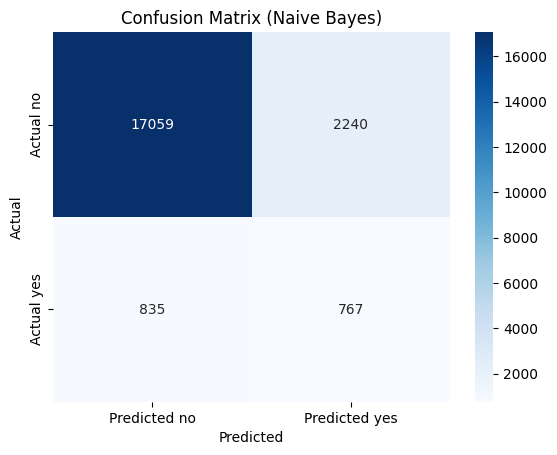

Model: Logistic Regression
F1 Score: 0.21626984126984128
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19299
           1       0.53      0.14      0.22      1602

    accuracy                           0.92     20901
   macro avg       0.73      0.56      0.59     20901
weighted avg       0.90      0.92      0.90     20901

AUC Score: 0.8489146003114533


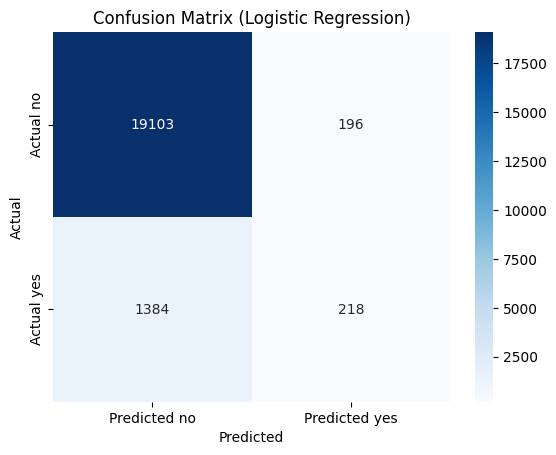

Model: Random Forest
F1 Score: 0.2475542322415993
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     19299
           1       0.39      0.18      0.25      1602

    accuracy                           0.92     20901
   macro avg       0.66      0.58      0.60     20901
weighted avg       0.89      0.92      0.90     20901

AUC Score: 0.7945363906288702


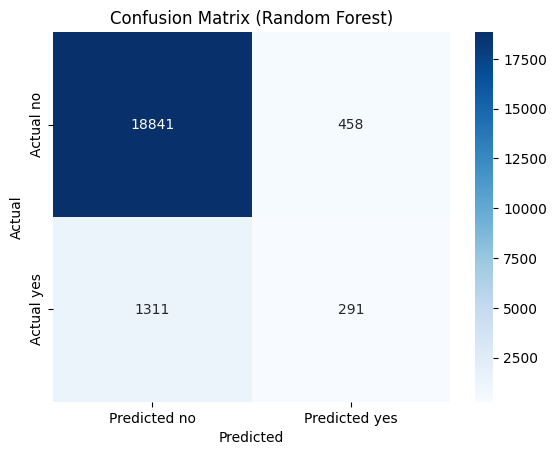

Model: Naive Bayes SMOTE
F1 Score: 0.33278795811518325
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     19299
           1       0.23      0.63      0.33      1602

    accuracy                           0.80     20901
   macro avg       0.59      0.73      0.61     20901
weighted avg       0.91      0.80      0.84     20901

AUC Score: 0.807924090818908


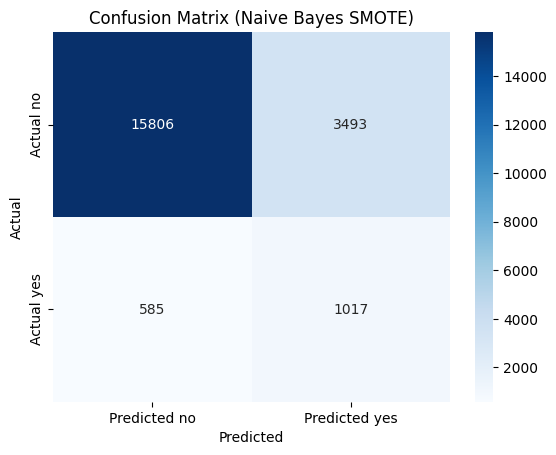

Model: Logistic Regression SMOTE
F1 Score: 0.3539368293788726
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     19299
           1       0.23      0.73      0.35      1602

    accuracy                           0.80     20901
   macro avg       0.60      0.77      0.62     20901
weighted avg       0.92      0.80      0.84     20901

AUC Score: 0.84387290771245


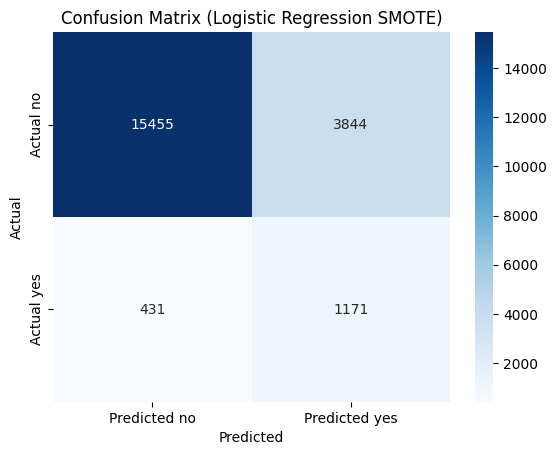

Model: Random Forest SMOTE
F1 Score: 0.3346167308365418
              precision    recall  f1-score   support

           0       0.96      0.84      0.89     19299
           1       0.23      0.60      0.33      1602

    accuracy                           0.82     20901
   macro avg       0.60      0.72      0.61     20901
weighted avg       0.91      0.82      0.85     20901

AUC Score: 0.7797002477407413


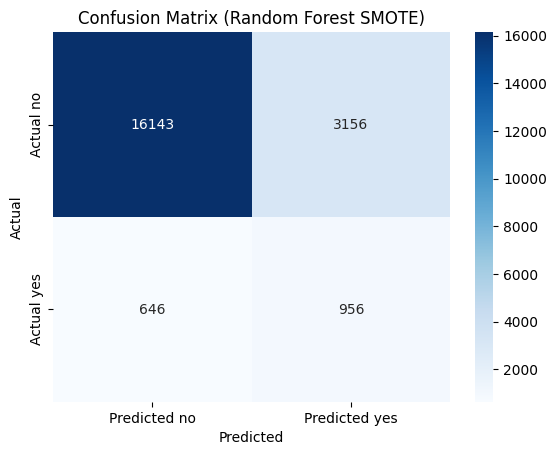

Model: XGBoost
F1 Score: 0.23996265172735762
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     19299
           1       0.48      0.16      0.24      1602

    accuracy                           0.92     20901
   macro avg       0.70      0.57      0.60     20901
weighted avg       0.90      0.92      0.90     20901

AUC Score: 0.8472878252927403


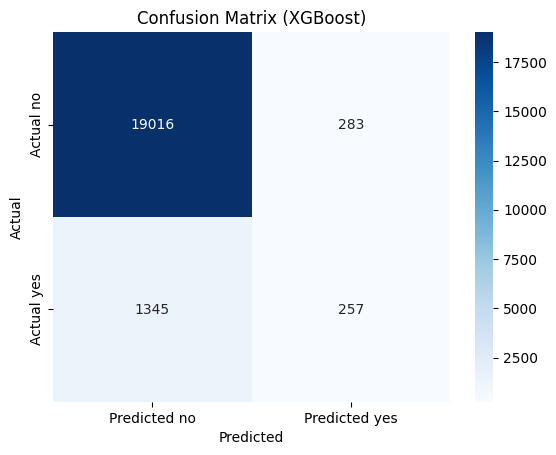

Model: XGBoost SMOTE
F1 Score: 0.3842045020984357
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     19299
           1       0.28      0.63      0.38      1602

    accuracy                           0.85     20901
   macro avg       0.62      0.75      0.65     20901
weighted avg       0.91      0.85      0.87     20901

AUC Score: 0.8369609009257626


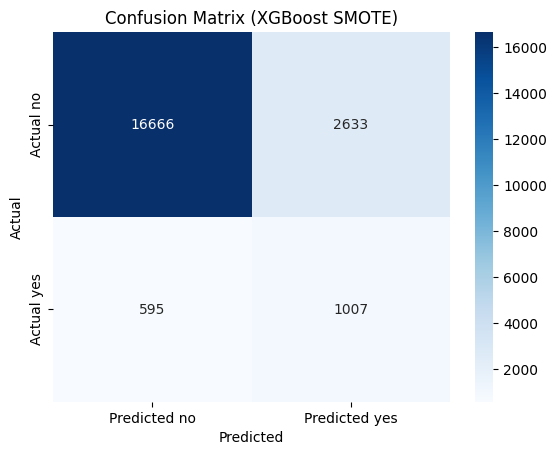

In [28]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(mortality_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(mortality_x_test)[:, 1]

    print(f"F1 Score: {f1_score(mortality_y_test, y_pred)}")
    print(classification_report(mortality_y_test, y_pred))
    fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(mortality_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

#### Hyperparameter Tuning
Use bayesian optimization to find best logistic regression model. Use random search cross validation for random forest

In [30]:
import optuna

def objective(trial):
    # Define the hyperparameters to tune
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_float('C', 1e-4, 1e2, log=True)
    max_iter = trial.suggest_int('max_iter', 50, 1000)

    if penalty == 'l2':
        solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg'])
    else:
        solver = 'liblinear'
    
    # Create the model with the suggested hyperparameters
    model = LogisticRegression(penalty=penalty, C=C, solver=solver, random_state=RANDOM_SEED, max_iter=max_iter)
    
    # Train the model
    model.fit(mortality_x_train, mortality_y_train)
    
    # Predict probabilities
    y_pred_proba = model.predict_proba(mortality_x_test)[:, 1]
    
    # Calculate ROC AUC score
    fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    return auc_score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=150)

# Print the best hyperparameters
print("Best hyperparameters: ", study.best_params)
print("Best ROC AUC score: ", study.best_value)


[I 2024-08-15 11:14:07,184] A new study created in memory with name: no-name-dbed9868-3a0a-4ca0-9e1e-685e28bcf3e1
[I 2024-08-15 11:14:07,242] Trial 0 finished with value: 0.831209614853292 and parameters: {'penalty': 'l2', 'C': 0.008504635216519618, 'max_iter': 459, 'solver': 'liblinear'}. Best is trial 0 with value: 0.831209614853292.
[I 2024-08-15 11:14:07,524] Trial 1 finished with value: 0.8488741047885697 and parameters: {'penalty': 'l1', 'C': 0.22253833171803847, 'max_iter': 295}. Best is trial 1 with value: 0.8488741047885697.
[I 2024-08-15 11:14:07,636] Trial 2 finished with value: 0.8488187954082734 and parameters: {'penalty': 'l2', 'C': 34.30914265813545, 'max_iter': 214, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8488741047885697.
[I 2024-08-15 11:14:07,840] Trial 3 finished with value: 0.8488705792198841 and parameters: {'penalty': 'l2', 'C': 0.15938923917915054, 'max_iter': 210, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.8488741047885697.
[I 2024-08-1

Best hyperparameters:  {'penalty': 'l2', 'C': 0.10767211752325649, 'max_iter': 994, 'solver': 'lbfgs'}
Best ROC AUC score:  0.8489954296338862


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in range(100, 1200, 100)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [{0: 1, 1: 10}, {0: 1, 1: 5}, {0: 1, 1: 2}, {0: 1, 1: 0.5}],
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier(random_state=RANDOM_SEED)

# Create the RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=RANDOM_SEED, n_jobs=-1, scoring='roc_auc')

# Fit the RandomizedSearchCV object to the data
rf_random.fit(mortality_x_res, mortality_y_res)

# Print the best hyperparameters
print("Best hyperparameters: ", rf_random.best_params_)
print("Best score: ", rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, class_weight={0: 1, 1: 5}, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   0.0s
[CV] END bootstrap=False, class_weight={0: 1, 1: 5}, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   0.0s
[CV] END bootstrap=False, class_weight={0: 1, 1: 5}, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100; total time=   0.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 5}, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 5}, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 5}, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, class_weight={0: 1, 1: 5}, max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=  20.7s
[CV] END bootstrap=True, class_weight={0: 1, 1: 2}, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  14.9s
[CV] END bootstrap=False, class_weight={0: 1, 1: 0.5}, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=  14.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 2}, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 2}, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bootstrap=True, class_weight={0: 1, 1: 2}, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.0s
[CV] END bo

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11

Best hyperparameters:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80, 'class_weight': {0: 1, 1: 2}, 'bootstrap': True}
Best score:  0.9887523551755427


In [67]:
# Use the best model/estimator from rf_random to get AUC score
best_rf_model = rf_random.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(mortality_x_test)[:, 1]

# Calculate ROC AUC score
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba_rf)
auc_score = auc(fpr, tpr)

print("Best RandomForestClassifier ROC AUC score: ", auc_score)

Best RandomForestClassifier ROC AUC score:  0.7774507731960263


In [70]:
# find best xgboost model

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 150, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    booster = trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart'])
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.5, 10)
    gamma = trial.suggest_float('gamma', 0, 10)
    eval_metric = trial.suggest_categorical('eval_metric', ['logloss', 'error', 'auc', 'aucpr'])
    
    model = XGBClassifier(
        booster=booster,
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=RANDOM_SEED,
        scale_pos_weight=scale_pos_weight,
        eval_metric=eval_metric,
        gamma=gamma,
    )
    
    model.fit(mortality_x_train, mortality_y_train)
    y_pred_proba = model.predict_proba(mortality_x_test)[:, 1]
    
    # Calculate ROC AUC score
    fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    return auc_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters: ", study.best_params)
print("Best ROC AUC score: ", study.best_value)

[I 2024-08-15 14:22:14,132] A new study created in memory with name: no-name-6eeab77d-f6f2-48f8-a2ea-fa94076df51a
[I 2024-08-15 14:22:15,345] Trial 0 finished with value: 0.8526901285823416 and parameters: {'n_estimators': 832, 'max_depth': 6, 'learning_rate': 0.00024063456134992232, 'subsample': 0.6096847104755242, 'colsample_bytree': 0.621705447843551, 'booster': 'gbtree', 'scale_pos_weight': 7.340558928669054, 'gamma': 0.6132372099445704, 'eval_metric': 'logloss'}. Best is trial 0 with value: 0.8526901285823416.
[I 2024-08-15 14:22:16,469] Trial 1 finished with value: 0.8563733290017355 and parameters: {'n_estimators': 551, 'max_depth': 10, 'learning_rate': 0.00011971006261478977, 'subsample': 0.9404836326625311, 'colsample_bytree': 0.6728993628145941, 'booster': 'gbtree', 'scale_pos_weight': 6.17052724722387, 'gamma': 4.1620414194424, 'eval_metric': 'auc'}. Best is trial 1 with value: 0.8563733290017355.
[I 2024-08-15 14:22:17,117] Trial 2 finished with value: 0.8361648501578324 an

Best hyperparameters:  {'n_estimators': 328, 'max_depth': 10, 'learning_rate': 0.08309252983780104, 'subsample': 0.9879363783748357, 'colsample_bytree': 0.5061183951389914, 'booster': 'gbtree', 'scale_pos_weight': 4.189689863637939, 'gamma': 4.809296075351341, 'eval_metric': 'aucpr'}
Best ROC AUC score:  0.8576777247260552


## Neural Network Model
Using TensorFlow

In [34]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [35]:
tf.random.set_seed(RANDOM_SEED)

### Non-SMOTE

In [36]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(mortality_x_train, mortality_y_train, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - auc: 0.6948 - f1_score: 0.1417 - loss: 0.2645 - val_auc: 0.8419 - val_f1_score: 0.1424 - val_loss: 0.2114
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.8431 - f1_score: 0.1417 - loss: 0.2069 - val_auc: 0.8481 - val_f1_score: 0.1424 - val_loss: 0.2091
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.8498 - f1_score: 0.1417 - loss: 0.2041 - val_auc: 0.8508 - val_f1_score: 0.1424 - val_loss: 0.2080
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8536 - f1_score: 0.1417 - loss: 0.2025 - val_auc: 0.8512 - val_f1_score: 0.1424 - val_loss: 0.2073
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8558 - f1_score: 0.1417 - loss: 0.2015 - val_auc: 0.8523 - val_f1_score: 0.1424 - val_loss: 0.2069
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.8577 - f1_score: 0.1417 - loss: 0.2006 - val_auc: 0.8530 - val_f1_score: 0.1424 - val_loss: 0.2066
Epoch 7/10
1524/

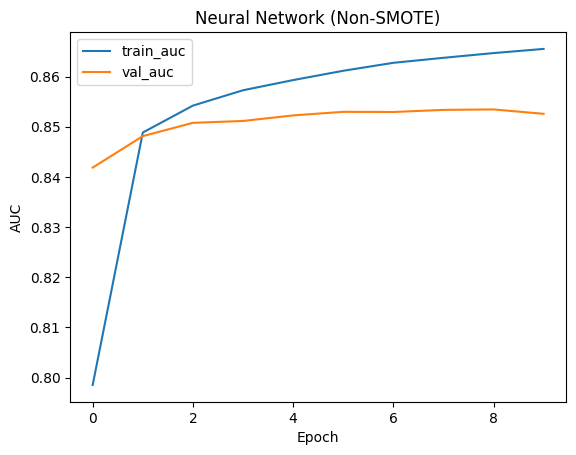

In [40]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [41]:
y_pred_proba = model.predict(mortality_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step


In [42]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [43]:
f1_score(mortality_y_test, y_pred)

0.2688221709006928

In [44]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.8532663649944281

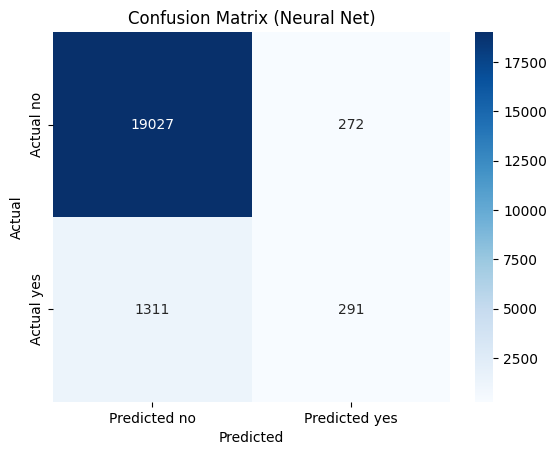

In [45]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

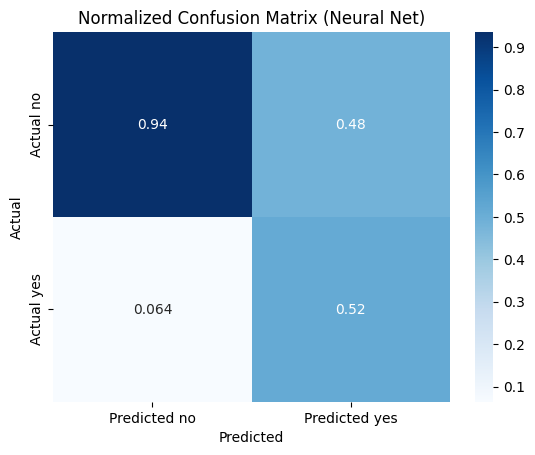

In [46]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [47]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [48]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [49]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [50]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [51]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model_smote.fit(mortality_x_res, mortality_y_res, epochs=10, batch_size=32, validation_data=(mortality_x_test, mortality_y_test))

Epoch 1/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - auc: 0.9142 - f1_score: 0.6223 - loss: 0.3721 - val_auc: 0.8492 - val_f1_score: 0.1424 - val_loss: 0.5524
Epoch 2/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - auc: 0.9442 - f1_score: 0.6223 - loss: 0.2982 - val_auc: 0.8480 - val_f1_score: 0.1424 - val_loss: 0.5569
Epoch 3/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - auc: 0.9479 - f1_score: 0.6223 - loss: 0.2882 - val_auc: 0.8470 - val_f1_score: 0.1424 - val_loss: 0.5598
Epoch 4/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - auc: 0.9505 - f1_score: 0.6223 - loss: 0.2812 - val_auc: 0.8455 - val_f1_score: 0.1424 - val_loss: 0.5615
Epoch 5/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - auc: 0.9526 - f1_score: 0.6223 - loss: 0.2752 - val_auc: 0.8438 - val_f1_score: 0.1424 - val_loss: 0.5634
Epoch 6/10
2107/2107 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - auc: 0.9546 - f1_score: 0.6223 - loss: 0.2697 - val_auc: 0.8421 - val_f1_score: 0.1424 - val_loss: 0.5716
Epoch 7/10
2107/

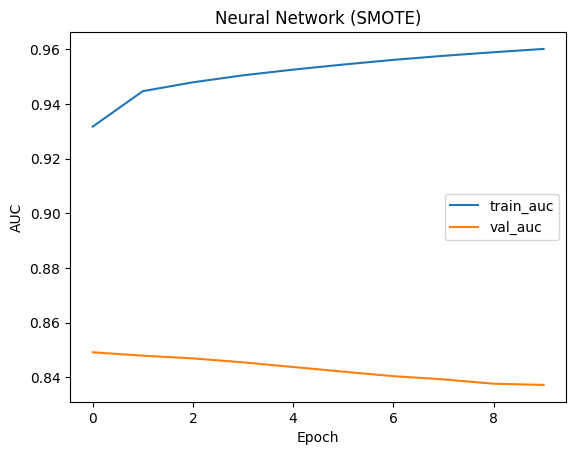

In [53]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [54]:
y_pred_proba = model_smote.predict(mortality_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step


In [55]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [56]:
f1_score(mortality_y_test, y_pred)

0.3548579970104634

In [57]:
fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
auc(fpr, tpr)

0.837840983138143

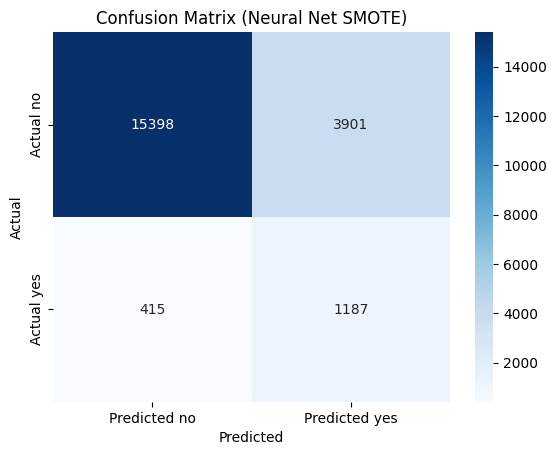

In [58]:
conf_mat = pd.DataFrame(confusion_matrix(mortality_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

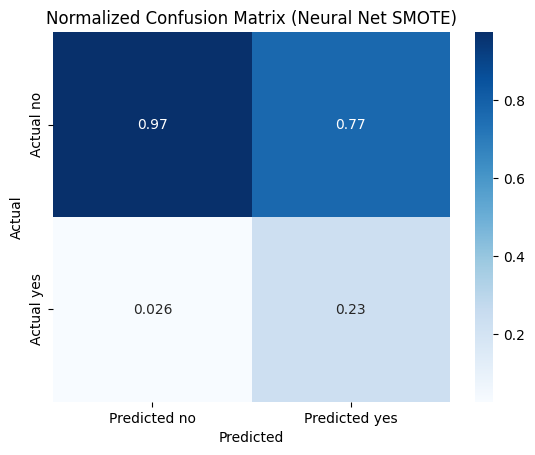

In [59]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [60]:
precision, recall, _ = precision_recall_curve(mortality_y_test, y_pred_proba)

In [61]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

In [57]:
### WARNING: This takes a long time to run
# import optuna
# from tensorflow.keras.optimizers import Adam

# def objective(trial):
#     n_layers = trial.suggest_int('n_layers', 1, 3)
#     units = trial.suggest_int('units', 32, 128)
#     dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
#     learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

#     model = Sequential()
#     model.add(Input((mortality_x_train.shape[1],)))
#     model.add(Dense(units, activation='relu'))
#     model.add(Dropout(dropout_rate))
    
#     for _ in range(n_layers - 1):
#         model.add(Dense(units, activation='relu'))
#         model.add(Dropout(dropout_rate))
    
#     model.add(Dense(1, activation='sigmoid'))
    
#     model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['AUC'])
    
#     model.fit(
#         mortality_x_train,
#         mortality_y_train,
#         epochs=trial.suggest_int('epochs', 5, 25),
#         batch_size=trial.suggest_int('batch_size', 16, 128),
#         verbose=0
#     )
    
#     y_pred_proba = model.predict(mortality_x_test).ravel()
#     fpr, tpr, _ = roc_curve(mortality_y_test, y_pred_proba)
#     auc_score = auc(fpr, tpr)
    
#     return auc_score

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print("Best trial:")
# trial = study.best_trial
# print(f"  AUC Score: {trial.value}")
# print("  Params: ")
# for key, value in trial.params.items():
#     print(f"    {key}: {value}")


[I 2024-08-14 17:15:12,745] A new study created in memory with name: no-name-d8bf7128-544e-46f4-8c9e-f0f0e3608f56


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step


[I 2024-08-14 17:16:00,460] Trial 0 finished with value: 0.8537340527045996 and parameters: {'n_layers': 2, 'units': 38, 'dropout_rate': 0.34182934624682637, 'learning_rate': 0.0009956891995226182, 'epochs': 7, 'batch_size': 77}. Best is trial 0 with value: 0.8537340527045996.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:18:32,243] Trial 1 finished with value: 0.8359779950174981 and parameters: {'n_layers': 3, 'units': 43, 'dropout_rate': 0.3488883786299563, 'learning_rate': 7.932789261639837e-05, 'epochs': 12, 'batch_size': 44}. Best is trial 0 with value: 0.8537340527045996.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step


[I 2024-08-14 17:20:36,858] Trial 2 finished with value: 0.8448377329519507 and parameters: {'n_layers': 1, 'units': 70, 'dropout_rate': 0.34099420132968805, 'learning_rate': 0.00010561454212064871, 'epochs': 22, 'batch_size': 61}. Best is trial 0 with value: 0.8537340527045996.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:22:28,176] Trial 3 finished with value: 0.8551737785149774 and parameters: {'n_layers': 3, 'units': 78, 'dropout_rate': 0.3493455796302543, 'learning_rate': 0.002667880029769103, 'epochs': 13, 'batch_size': 58}. Best is trial 3 with value: 0.8551737785149774.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step


[I 2024-08-14 17:23:36,695] Trial 4 finished with value: 0.8492279554437981 and parameters: {'n_layers': 1, 'units': 76, 'dropout_rate': 0.2137757871592578, 'learning_rate': 0.00021181586141904096, 'epochs': 15, 'batch_size': 78}. Best is trial 3 with value: 0.8551737785149774.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:24:37,798] Trial 5 finished with value: 0.648516683282122 and parameters: {'n_layers': 2, 'units': 104, 'dropout_rate': 0.47680114779855515, 'learning_rate': 1.1368876791332238e-05, 'epochs': 9, 'batch_size': 63}. Best is trial 3 with value: 0.8551737785149774.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step


[I 2024-08-14 17:25:30,033] Trial 6 finished with value: 0.7929173783301988 and parameters: {'n_layers': 2, 'units': 120, 'dropout_rate': 0.23323487854360597, 'learning_rate': 1.8651432497623227e-05, 'epochs': 15, 'batch_size': 122}. Best is trial 3 with value: 0.8551737785149774.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:27:49,861] Trial 7 finished with value: 0.6161918113783234 and parameters: {'n_layers': 3, 'units': 43, 'dropout_rate': 0.39389975561125773, 'learning_rate': 1.1286512162049345e-05, 'epochs': 6, 'batch_size': 21}. Best is trial 3 with value: 0.8551737785149774.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step


[I 2024-08-14 17:31:09,919] Trial 8 finished with value: 0.8559801957486299 and parameters: {'n_layers': 2, 'units': 52, 'dropout_rate': 0.3945453425910822, 'learning_rate': 0.00252448760635583, 'epochs': 18, 'batch_size': 36}. Best is trial 8 with value: 0.8559801957486299.


654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


[I 2024-08-14 17:31:33,701] Trial 9 finished with value: 0.8370765169373819 and parameters: {'n_layers': 1, 'units': 118, 'dropout_rate': 0.2049464569350314, 'learning_rate': 0.00025013670135765796, 'epochs': 8, 'batch_size': 118}. Best is trial 8 with value: 0.8559801957486299.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step


[I 2024-08-14 17:38:43,680] Trial 10 finished with value: 0.8433659374044014 and parameters: {'n_layers': 2, 'units': 59, 'dropout_rate': 0.43512070220156723, 'learning_rate': 0.008599976275409652, 'epochs': 21, 'batch_size': 19}. Best is trial 8 with value: 0.8559801957486299.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step


[I 2024-08-14 17:42:17,457] Trial 11 finished with value: 0.8557060908694951 and parameters: {'n_layers': 3, 'units': 94, 'dropout_rate': 0.30067137458719495, 'learning_rate': 0.0024629953416263795, 'epochs': 18, 'batch_size': 39}. Best is trial 8 with value: 0.8559801957486299.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step


[I 2024-08-14 17:46:04,485] Trial 12 finished with value: 0.8573554909826626 and parameters: {'n_layers': 3, 'units': 97, 'dropout_rate': 0.28823036269321733, 'learning_rate': 0.0014163056251723682, 'epochs': 19, 'batch_size': 39}. Best is trial 12 with value: 0.8573554909826626.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step


[I 2024-08-14 17:50:22,357] Trial 13 finished with value: 0.856890536396839 and parameters: {'n_layers': 2, 'units': 91, 'dropout_rate': 0.2783166334230079, 'learning_rate': 0.0009137560465943134, 'epochs': 25, 'batch_size': 39}. Best is trial 12 with value: 0.8573554909826626.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step


[I 2024-08-14 17:52:46,024] Trial 14 finished with value: 0.8580148046715272 and parameters: {'n_layers': 3, 'units': 94, 'dropout_rate': 0.27076064417855605, 'learning_rate': 0.0007594095155734889, 'epochs': 25, 'batch_size': 85}. Best is trial 14 with value: 0.8580148046715272.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step


[I 2024-08-14 17:54:48,948] Trial 15 finished with value: 0.8567738044942139 and parameters: {'n_layers': 3, 'units': 104, 'dropout_rate': 0.27145707177611783, 'learning_rate': 0.0006906369925844442, 'epochs': 24, 'batch_size': 94}. Best is trial 14 with value: 0.8580148046715272.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:56:34,779] Trial 16 finished with value: 0.8553508979105927 and parameters: {'n_layers': 3, 'units': 91, 'dropout_rate': 0.2541198925996161, 'learning_rate': 0.00693551989584968, 'epochs': 19, 'batch_size': 90}. Best is trial 14 with value: 0.8580148046715272.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 17:58:30,874] Trial 17 finished with value: 0.8588452378203084 and parameters: {'n_layers': 3, 'units': 106, 'dropout_rate': 0.3079493418018061, 'learning_rate': 0.000538235504321661, 'epochs': 22, 'batch_size': 93}. Best is trial 17 with value: 0.8588452378203084.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step


[I 2024-08-14 18:00:23,169] Trial 18 finished with value: 0.8581656278530019 and parameters: {'n_layers': 3, 'units': 128, 'dropout_rate': 0.311147262692447, 'learning_rate': 0.00032980962118906056, 'epochs': 23, 'batch_size': 105}. Best is trial 17 with value: 0.8588452378203084.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:02:17,309] Trial 19 finished with value: 0.8500146100860116 and parameters: {'n_layers': 3, 'units': 127, 'dropout_rate': 0.31502618323109033, 'learning_rate': 5.604080111323266e-05, 'epochs': 22, 'batch_size': 99}. Best is trial 17 with value: 0.8588452378203084.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step


[I 2024-08-14 18:03:57,388] Trial 20 finished with value: 0.858946039974515 and parameters: {'n_layers': 3, 'units': 112, 'dropout_rate': 0.3836468716963082, 'learning_rate': 0.0003483225610139182, 'epochs': 21, 'batch_size': 108}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:05:36,733] Trial 21 finished with value: 0.858692910611826 and parameters: {'n_layers': 3, 'units': 113, 'dropout_rate': 0.4049873646229799, 'learning_rate': 0.00045007009128697186, 'epochs': 21, 'batch_size': 105}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:07:07,923] Trial 22 finished with value: 0.8578995606235768 and parameters: {'n_layers': 3, 'units': 111, 'dropout_rate': 0.393209596561621, 'learning_rate': 0.0004159332199581817, 'epochs': 20, 'batch_size': 110}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:08:27,763] Trial 23 finished with value: 0.8506906459676324 and parameters: {'n_layers': 3, 'units': 112, 'dropout_rate': 0.43470198244268526, 'learning_rate': 0.0001490551082098743, 'epochs': 17, 'batch_size': 112}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:09:53,264] Trial 24 finished with value: 0.8569415439364456 and parameters: {'n_layers': 3, 'units': 106, 'dropout_rate': 0.4239458254907624, 'learning_rate': 0.0004639427405379805, 'epochs': 21, 'batch_size': 126}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step


[I 2024-08-14 18:11:27,767] Trial 25 finished with value: 0.8545966202798863 and parameters: {'n_layers': 2, 'units': 120, 'dropout_rate': 0.3751324786046968, 'learning_rate': 0.00015074596754969667, 'epochs': 23, 'batch_size': 102}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:13:04,130] Trial 26 finished with value: 0.8559765408012769 and parameters: {'n_layers': 3, 'units': 85, 'dropout_rate': 0.471741582636053, 'learning_rate': 0.000476827292475205, 'epochs': 16, 'batch_size': 83}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step


[I 2024-08-14 18:14:16,777] Trial 27 finished with value: 0.8386345918837268 and parameters: {'n_layers': 2, 'units': 111, 'dropout_rate': 0.37221423476040727, 'learning_rate': 5.503475582455853e-05, 'epochs': 20, 'batch_size': 114}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step


[I 2024-08-14 18:15:24,760] Trial 28 finished with value: 0.8568746875100876 and parameters: {'n_layers': 3, 'units': 100, 'dropout_rate': 0.4983367871783119, 'learning_rate': 0.0015914173302778829, 'epochs': 13, 'batch_size': 95}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step


[I 2024-08-14 18:17:42,305] Trial 29 finished with value: 0.8541427113977883 and parameters: {'n_layers': 2, 'units': 115, 'dropout_rate': 0.3299803602280966, 'learning_rate': 0.0044598629498723815, 'epochs': 23, 'batch_size': 70}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:19:32,034] Trial 30 finished with value: 0.8585928523849566 and parameters: {'n_layers': 3, 'units': 84, 'dropout_rate': 0.4120581575816209, 'learning_rate': 0.0011303486335513598, 'epochs': 21, 'batch_size': 105}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2024-08-14 18:21:12,089] Trial 31 finished with value: 0.8560752243798055 and parameters: {'n_layers': 3, 'units': 66, 'dropout_rate': 0.4142031960888735, 'learning_rate': 0.0015337003596258788, 'epochs': 21, 'batch_size': 107}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:23:03,827] Trial 32 finished with value: 0.8585948739266341 and parameters: {'n_layers': 3, 'units': 87, 'dropout_rate': 0.37105290000299246, 'learning_rate': 0.0006384451034792423, 'epochs': 20, 'batch_size': 89}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:24:50,700] Trial 33 finished with value: 0.8569682282865885 and parameters: {'n_layers': 3, 'units': 107, 'dropout_rate': 0.358909027658936, 'learning_rate': 0.0005728748724528505, 'epochs': 19, 'batch_size': 88}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:26:48,508] Trial 34 finished with value: 0.8565639199510896 and parameters: {'n_layers': 3, 'units': 122, 'dropout_rate': 0.33227122114492263, 'learning_rate': 0.00015078963041353889, 'epochs': 17, 'batch_size': 73}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:28:49,520] Trial 35 finished with value: 0.8575684806138033 and parameters: {'n_layers': 3, 'units': 100, 'dropout_rate': 0.37040258441023205, 'learning_rate': 0.0002859880234075816, 'epochs': 24, 'batch_size': 98}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step


[I 2024-08-14 18:29:32,375] Trial 36 finished with value: 0.7721928241545315 and parameters: {'n_layers': 1, 'units': 32, 'dropout_rate': 0.45561428684142624, 'learning_rate': 8.506580169508056e-05, 'epochs': 10, 'batch_size': 83}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:31:52,788] Trial 37 finished with value: 0.8552627910381208 and parameters: {'n_layers': 3, 'units': 72, 'dropout_rate': 0.35412775229511423, 'learning_rate': 0.00020731832090456367, 'epochs': 22, 'batch_size': 76}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step


[I 2024-08-14 18:34:22,479] Trial 38 finished with value: 0.8576440054108746 and parameters: {'n_layers': 2, 'units': 84, 'dropout_rate': 0.3868686936942235, 'learning_rate': 0.0003567335016611752, 'epochs': 20, 'batch_size': 54}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step


[I 2024-08-14 18:35:12,121] Trial 39 finished with value: 0.8581301457534783 and parameters: {'n_layers': 3, 'units': 101, 'dropout_rate': 0.32605385939321624, 'learning_rate': 0.0010062350505363256, 'epochs': 12, 'batch_size': 120}. Best is trial 20 with value: 0.858946039974515.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step


[I 2024-08-14 18:38:00,269] Trial 40 finished with value: 0.8591746359074061 and parameters: {'n_layers': 3, 'units': 115, 'dropout_rate': 0.34639622275680854, 'learning_rate': 0.0006394252790610348, 'epochs': 24, 'batch_size': 67}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step


[I 2024-08-14 18:41:09,410] Trial 41 finished with value: 0.8570730573518166 and parameters: {'n_layers': 3, 'units': 116, 'dropout_rate': 0.3409685867783997, 'learning_rate': 0.0006172982350403053, 'epochs': 24, 'batch_size': 59}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step


[I 2024-08-14 18:44:03,930] Trial 42 finished with value: 0.8581762692483921 and parameters: {'n_layers': 3, 'units': 124, 'dropout_rate': 0.35380513554852094, 'learning_rate': 0.000763272568005038, 'epochs': 23, 'batch_size': 64}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step


[I 2024-08-14 18:47:33,538] Trial 43 finished with value: 0.8577202256182829 and parameters: {'n_layers': 3, 'units': 107, 'dropout_rate': 0.40196748334183247, 'learning_rate': 0.0002250030426687333, 'epochs': 22, 'batch_size': 49}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step


[I 2024-08-14 18:50:22,877] Trial 44 finished with value: 0.8590488960150658 and parameters: {'n_layers': 3, 'units': 114, 'dropout_rate': 0.3660162801437707, 'learning_rate': 0.0004893237453308364, 'epochs': 25, 'batch_size': 69}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step


[I 2024-08-14 18:53:08,548] Trial 45 finished with value: 0.8591450890542477 and parameters: {'n_layers': 3, 'units': 115, 'dropout_rate': 0.30371343779923643, 'learning_rate': 0.00034609892927861806, 'epochs': 25, 'batch_size': 71}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 18:56:01,958] Trial 46 finished with value: 0.8560305563948998 and parameters: {'n_layers': 3, 'units': 118, 'dropout_rate': 0.2963340684983217, 'learning_rate': 0.00011531683214903466, 'epochs': 25, 'batch_size': 67}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step


[I 2024-08-14 18:57:46,280] Trial 47 finished with value: 0.856845674343932 and parameters: {'n_layers': 1, 'units': 123, 'dropout_rate': 0.24909681539250034, 'learning_rate': 0.0002854781180023948, 'epochs': 25, 'batch_size': 79}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step


[I 2024-08-14 19:00:53,870] Trial 48 finished with value: 0.8559356571423913 and parameters: {'n_layers': 2, 'units': 109, 'dropout_rate': 0.3128950986962351, 'learning_rate': 0.002061541743198257, 'epochs': 24, 'batch_size': 54}. Best is trial 40 with value: 0.8591746359074061.


654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2024-08-14 19:03:50,147] Trial 49 finished with value: 0.8598375398542899 and parameters: {'n_layers': 3, 'units': 103, 'dropout_rate': 0.29277019570509566, 'learning_rate': 0.00019225714400195702, 'epochs': 25, 'batch_size': 69}. Best is trial 49 with value: 0.8598375398542899.


Best trial:
  AUC Score: 0.8598375398542899
  Params: 
    n_layers: 3
    units: 103
    dropout_rate: 0.29277019570509566
    learning_rate: 0.00019225714400195702
    epochs: 25
    batch_size: 69


## Comparisons

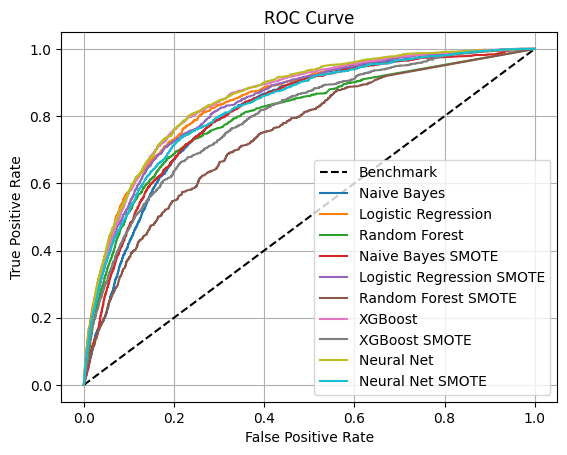

In [58]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

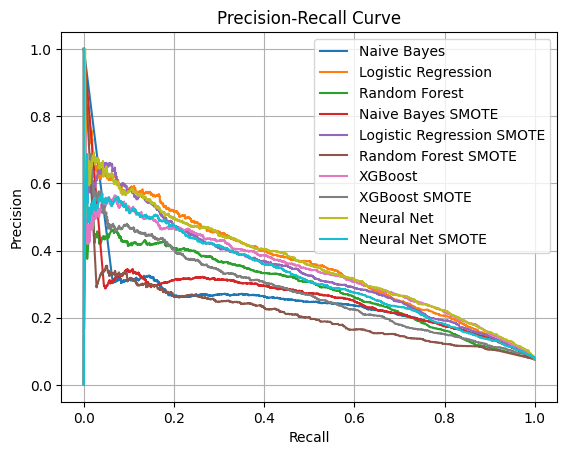

In [59]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [60]:
# coeff
coeffs = pd.DataFrame({
    'Feature': mortality_x_train.columns,
    'Coefficient': simple_models['Logistic Regression'].coef_[0]
})
coeffs

,Feature,Coefficient
0,GENDER,0.414624
1,Anemia category,0.484400
2,PreopEGFRMDRD,0.575353
3,AnaestypeCategory,-0.149533
4,PriorityCategory,0.455919
5,AGEcategory,0.392388
6,SurgRiskCategory,0.322152
7,CVARCRICategory,0.118290
8,IHDRCRICategory,-0.052372
9,CHFRCRICategory,0.387669


# ICU

In [61]:
icu_cares = cares[feature_columns + ['ICUAdmgt24h']]

In [62]:
icu_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_72645/2832208095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_cares.dropna(how='any', inplace=True)


In [63]:
icu_cares.shape

(69667, 20)

In [64]:
icu_X = icu_cares.drop('ICUAdmgt24h', axis=1)
icu_y = icu_cares['ICUAdmgt24h']

In [65]:
icu_x_train, icu_x_test, icu_y_train, icu_y_test = train_test_split(icu_X, icu_y, test_size=0.3, random_state=RANDOM_SEED, stratify=icu_y)

In [66]:
icu_y_train.value_counts(normalize=True)

ICUAdmgt24h
0    0.983226
1    0.016774
Name: proportion, dtype: float64

In [67]:
icu_x_res, icu_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(icu_x_train, icu_y_train)

In [68]:
icu_y_res.value_counts(normalize=True)

ICUAdmgt24h
0    0.5
1    0.5
Name: proportion, dtype: float64

## Simple Models
- Naive Bayes
- Logistic Regression
- Random Forest
- XGBoost

In [69]:
model_evaluations = {}

In [70]:
simple_models = {}

simple_models['Naive Bayes'] = GaussianNB()
simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)

# default the same for smote data
simple_models['Naive Bayes SMOTE'] = GaussianNB()
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [71]:
simple_models['Naive Bayes'].fit(icu_x_train, icu_y_train)
simple_models['Logistic Regression'].fit(icu_x_train, icu_y_train)
simple_models['Random Forest'].fit(icu_x_train, icu_y_train)
simple_models['XGBoost'].fit(icu_x_train, icu_y_train)

simple_models['Naive Bayes SMOTE'].fit(icu_x_res, icu_y_res)
simple_models['Logistic Regression SMOTE'].fit(icu_x_res, icu_y_res)
simple_models['Random Forest SMOTE'].fit(icu_x_res, icu_y_res)
simple_models['XGBoost SMOTE'].fit(icu_x_res, icu_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Naive Bayes
F1 Score: 0.1416633505769996
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     20550
           1       0.08      0.51      0.14       351

    accuracy                           0.90     20901
   macro avg       0.54      0.71      0.54     20901
weighted avg       0.98      0.90      0.93     20901

AUC Score: 0.8524477856108028


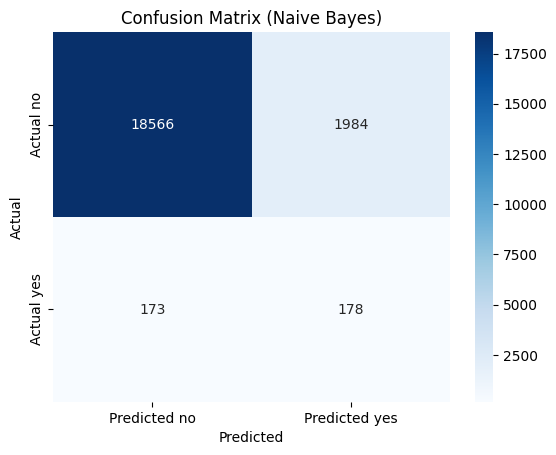

Model: Logistic Regression
F1 Score: 0.0979381443298969
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20550
           1       0.51      0.05      0.10       351

    accuracy                           0.98     20901
   macro avg       0.75      0.53      0.54     20901
weighted avg       0.98      0.98      0.98     20901

AUC Score: 0.894668829413355


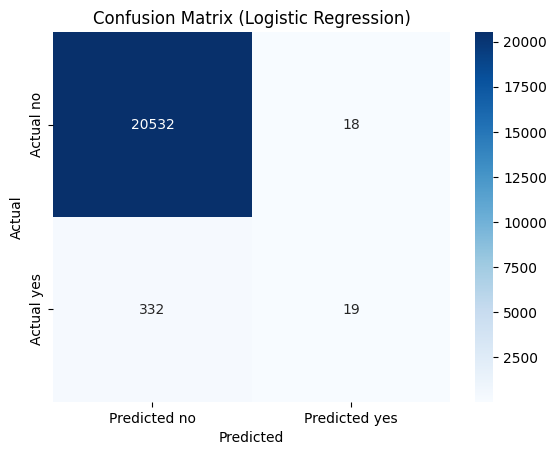

Model: Random Forest
F1 Score: 0.10810810810810811
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20550
           1       0.26      0.07      0.11       351

    accuracy                           0.98     20901
   macro avg       0.62      0.53      0.55     20901
weighted avg       0.97      0.98      0.98     20901

AUC Score: 0.8254360499372665


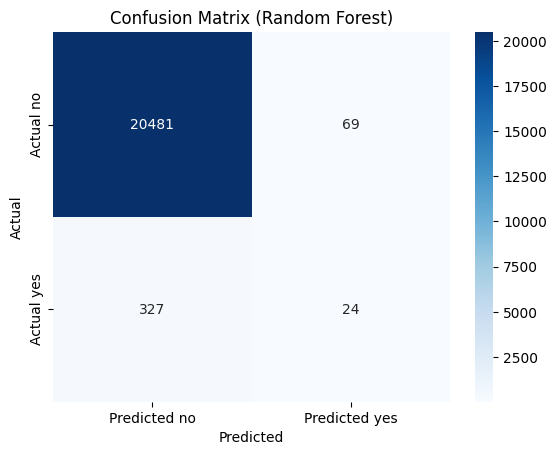

Model: XGBoost
F1 Score: 0.13921113689095127
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20550
           1       0.38      0.09      0.14       351

    accuracy                           0.98     20901
   macro avg       0.68      0.54      0.57     20901
weighted avg       0.97      0.98      0.98     20901

AUC Score: 0.8783441817261769


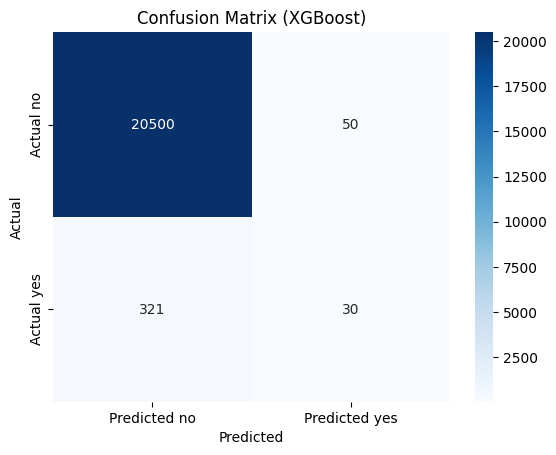

Model: Naive Bayes SMOTE
F1 Score: 0.09447700230864856
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     20550
           1       0.05      0.76      0.09       351

    accuracy                           0.76     20901
   macro avg       0.52      0.76      0.48     20901
weighted avg       0.98      0.76      0.85     20901

AUC Score: 0.7987847027263085


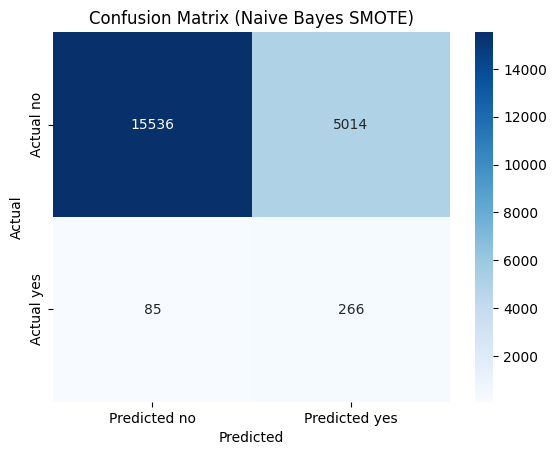

Model: Logistic Regression SMOTE
F1 Score: 0.13505747126436782
              precision    recall  f1-score   support

           0       1.00      0.83      0.90     20550
           1       0.07      0.80      0.14       351

    accuracy                           0.83     20901
   macro avg       0.53      0.82      0.52     20901
weighted avg       0.98      0.83      0.89     20901

AUC Score: 0.8747990101274772


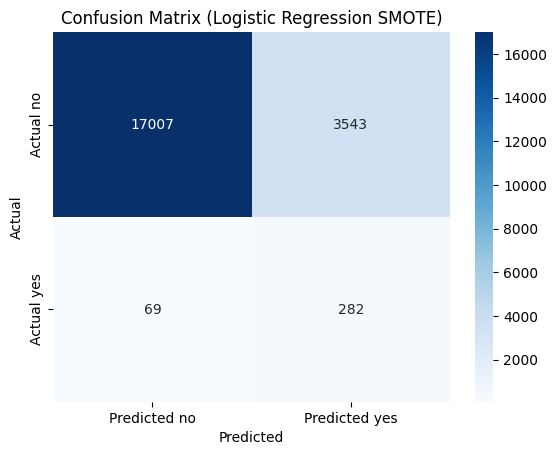

Model: Random Forest SMOTE
F1 Score: 0.10061182868796736
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     20550
           1       0.07      0.21      0.10       351

    accuracy                           0.94     20901
   macro avg       0.53      0.58      0.53     20901
weighted avg       0.97      0.94      0.95     20901

AUC Score: 0.7781121023700099


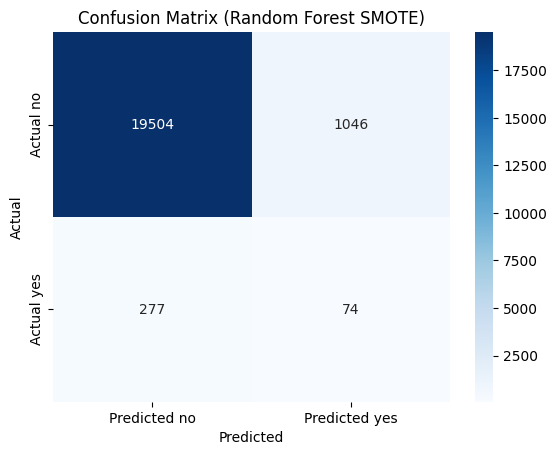

Model: XGBoost SMOTE
F1 Score: 0.15419501133786848
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     20550
           1       0.10      0.39      0.15       351

    accuracy                           0.93     20901
   macro avg       0.54      0.66      0.56     20901
weighted avg       0.97      0.93      0.95     20901

AUC Score: 0.7808469371486403


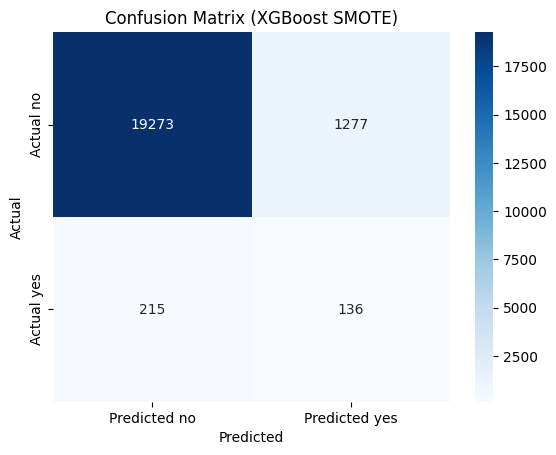

In [72]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(icu_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(icu_x_test)[:, 1]

    print(f"F1 Score: {f1_score(icu_y_test, y_pred)}")
    print(classification_report(icu_y_test, y_pred))
    fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(icu_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

### Non-SMOTE

In [73]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [75]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_185 (Dense)               │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_186 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
history = model.fit(icu_x_train, icu_y_train, epochs=10, batch_size=32, validation_data=(icu_x_test, icu_y_test))

Epoch 1/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.6422 - f1_score: 0.0335 - loss: 0.0997 - val_auc: 0.8818 - val_f1_score: 0.0330 - val_loss: 0.0650
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8790 - f1_score: 0.0321 - loss: 0.0622 - val_auc: 0.8951 - val_f1_score: 0.0330 - val_loss: 0.0670
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8798 - f1_score: 0.0348 - loss: 0.0646 - val_auc: 0.8955 - val_f1_score: 0.0330 - val_loss: 0.0631
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8880 - f1_score: 0.0338 - loss: 0.0618 - val_auc: 0.8924 - val_f1_score: 0.0330 - val_loss: 0.0609
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8939 - f1_score: 0.0351 - loss: 0.0626 - val_auc: 0.8898 - val_f1_score: 0.0330 - val_loss: 0.0614
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - auc: 0.8935 - f1_score: 0.0325 - loss: 0.0590 - val_auc: 0.8922 - val_f1_score: 0.0330 - val_loss: 0.0615
Epoch 7/10
1524/

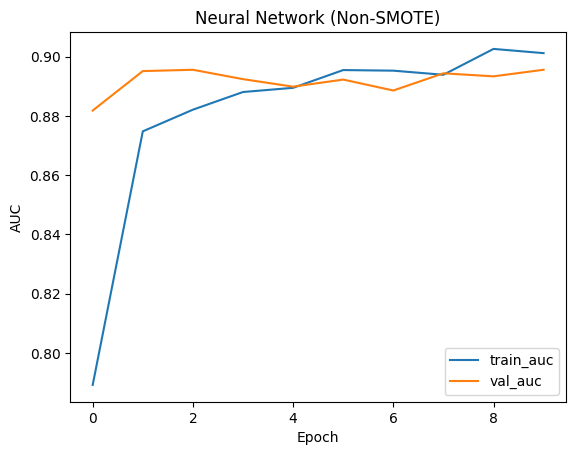

In [77]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [78]:
y_pred_proba = model.predict(icu_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step


In [79]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [80]:
f1_score(icu_y_test, y_pred)

0.08785529715762273

In [81]:
fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
auc(fpr, tpr)

0.9018000707051802

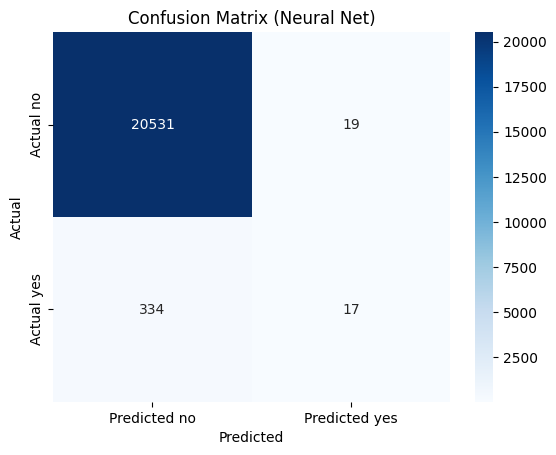

In [82]:
conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

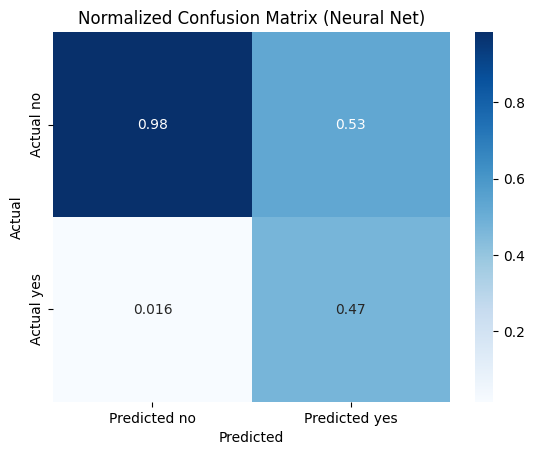

In [83]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [84]:
precision, recall, _ = precision_recall_curve(icu_y_test, y_pred_proba)

In [85]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [86]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [87]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [88]:
model_smote.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_188 (Dense)               │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
history = model_smote.fit(icu_x_res, icu_y_res, epochs=10, batch_size=32, validation_data=(icu_x_test, icu_y_test))

Epoch 1/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - auc: 0.8972 - f1_score: 0.6652 - loss: 0.4074 - val_auc: 0.8730 - val_f1_score: 0.0330 - val_loss: 0.3029
Epoch 2/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.9280 - f1_score: 0.6669 - loss: 0.3377 - val_auc: 0.8669 - val_f1_score: 0.0330 - val_loss: 0.2911
Epoch 3/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - auc: 0.9359 - f1_score: 0.6669 - loss: 0.3173 - val_auc: 0.8614 - val_f1_score: 0.0331 - val_loss: 0.3772
Epoch 4/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - auc: 0.9414 - f1_score: 0.6683 - loss: 0.3024 - val_auc: 0.8550 - val_f1_score: 0.0331 - val_loss: 0.4306
Epoch 5/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - auc: 0.9453 - f1_score: 0.6683 - loss: 0.2927 - val_auc: 0.8530 - val_f1_score: 0.0331 - val_loss: 0.2892
Epoch 6/10
2997/2997 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - auc: 0.9488 - f1_score: 0.6647 - loss: 0.2830 - val_auc: 0.8495 - val_f1_score: 0.0332 - val_loss: 0.3549
Epoch 7/10
2997/

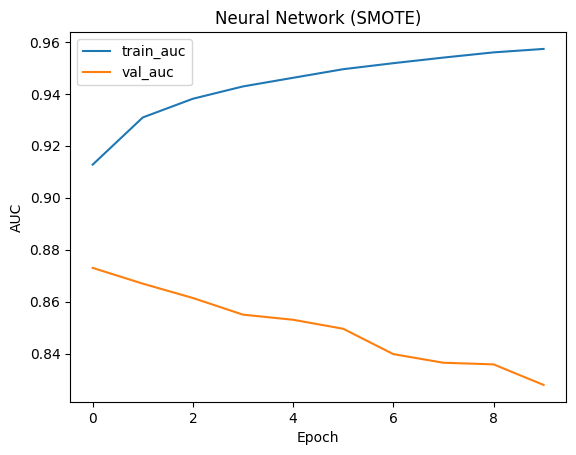

In [90]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [91]:
y_pred_proba = model_smote.predict(icu_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step


In [92]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [93]:
f1_score(icu_y_test, y_pred)

0.14150347441566646

In [94]:
fpr, tpr, _ = roc_curve(icu_y_test, y_pred_proba)
auc(fpr, tpr)

0.830492648740824

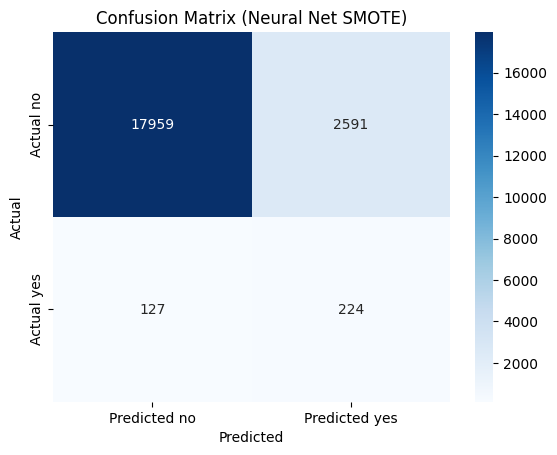

In [95]:
conf_mat = pd.DataFrame(confusion_matrix(icu_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

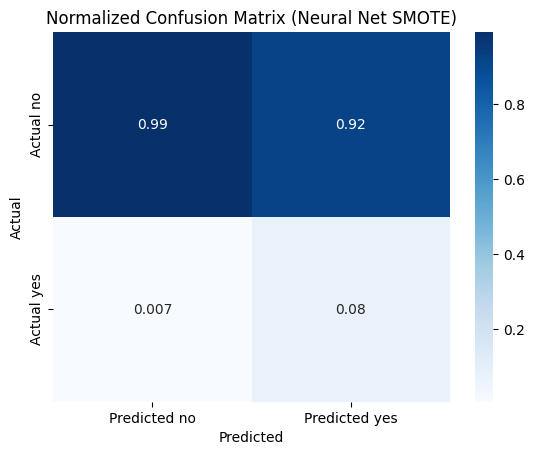

In [96]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [97]:
precision, recall, _ = precision_recall_curve(icu_y_test, y_pred_proba)

In [98]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

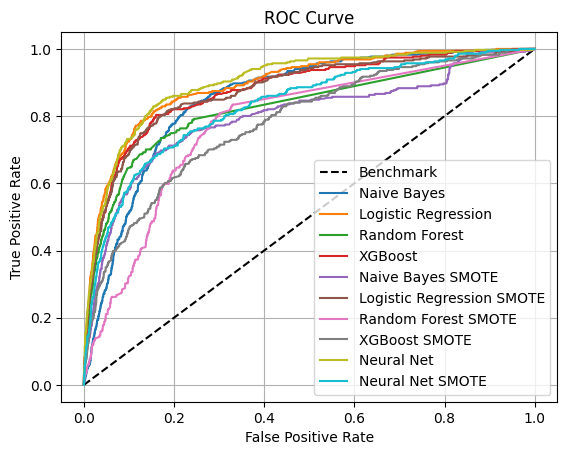

In [99]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

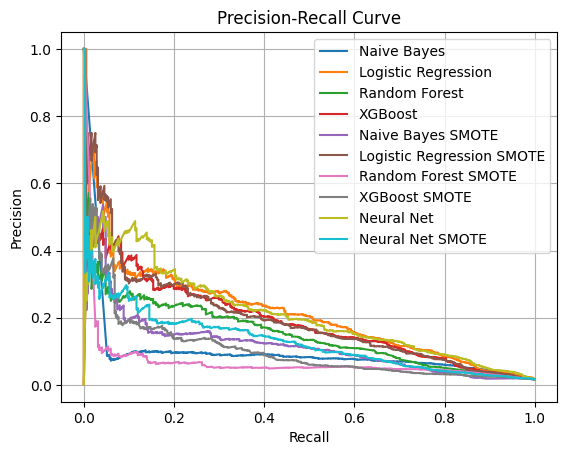

In [100]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Thirty Days Mortality

In [101]:
thirty_days_cares = cares[feature_columns + ['thirtydaymortality']]

In [102]:
thirty_days_cares.dropna(how='any', inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_72645/1318475980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thirty_days_cares.dropna(how='any', inplace=True)


In [103]:
thirty_days_cares.shape

(69667, 20)

In [104]:
thirty_days_X = thirty_days_cares.drop('thirtydaymortality', axis=1)
thirty_days_y = thirty_days_cares['thirtydaymortality']

In [105]:
thirty_days_x_train, thirty_days_x_test, thirty_days_y_train, thirty_days_y_test = train_test_split(thirty_days_X, thirty_days_y, test_size=0.3, random_state=RANDOM_SEED, stratify=thirty_days_y)

In [106]:
thirty_days_y_train.value_counts(normalize=True)

thirtydaymortality
0    0.992474
1    0.007526
Name: proportion, dtype: float64

In [107]:
thirty_days_x_res, thirty_days_y_res = SMOTE(random_state=RANDOM_SEED).fit_resample(thirty_days_x_train, thirty_days_y_train)

In [108]:
thirty_days_y_res.value_counts(normalize=True)

thirtydaymortality
0    0.5
1    0.5
Name: proportion, dtype: float64

## Simple Models
- Naive Bayes
- Logistic Regression
- Random Forest
- XGBoost

In [109]:
model_evaluations = {}

In [110]:
simple_models = {}

simple_models['Naive Bayes'] = GaussianNB()
simple_models['Logistic Regression'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost'] = XGBClassifier(random_state=RANDOM_SEED)

# default the same for smote data
simple_models['Naive Bayes SMOTE'] = GaussianNB()
simple_models['Logistic Regression SMOTE'] = LogisticRegression(random_state=RANDOM_SEED)
simple_models['Random Forest SMOTE'] = RandomForestClassifier(random_state=RANDOM_SEED)
simple_models['XGBoost SMOTE'] = XGBClassifier(random_state=RANDOM_SEED)

In [111]:
simple_models['Naive Bayes'].fit(thirty_days_x_train, thirty_days_y_train)
simple_models['Logistic Regression'].fit(thirty_days_x_train, thirty_days_y_train)
simple_models['Random Forest'].fit(thirty_days_x_train, thirty_days_y_train)
simple_models['XGBoost'].fit(thirty_days_x_train, thirty_days_y_train)


simple_models['Naive Bayes SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)
simple_models['Logistic Regression SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)
simple_models['Random Forest SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)
simple_models['XGBoost SMOTE'].fit(thirty_days_x_res, thirty_days_y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3402, ...)

Model: Naive Bayes
F1 Score: 0.08031341821743389
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     20744
           1       0.04      0.52      0.08       157

    accuracy                           0.91     20901
   macro avg       0.52      0.72      0.52     20901
weighted avg       0.99      0.91      0.95     20901

AUC Score: 0.8915577768170553


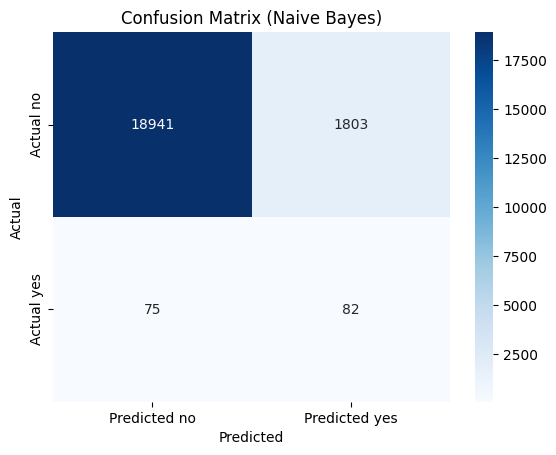

Model: Logistic Regression
F1 Score: 0.03680981595092025
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20744
           1       0.50      0.02      0.04       157

    accuracy                           0.99     20901
   macro avg       0.75      0.51      0.52     20901
weighted avg       0.99      0.99      0.99     20901

AUC Score: 0.934443172578795


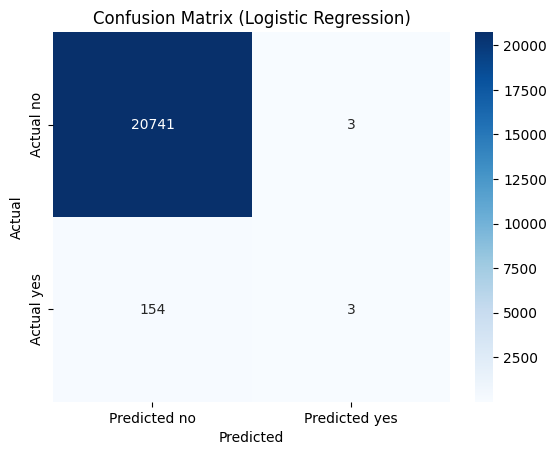

Model: Random Forest
F1 Score: 0.021739130434782608
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20744
           1       0.07      0.01      0.02       157

    accuracy                           0.99     20901
   macro avg       0.53      0.51      0.51     20901
weighted avg       0.99      0.99      0.99     20901

AUC Score: 0.8050454616913247


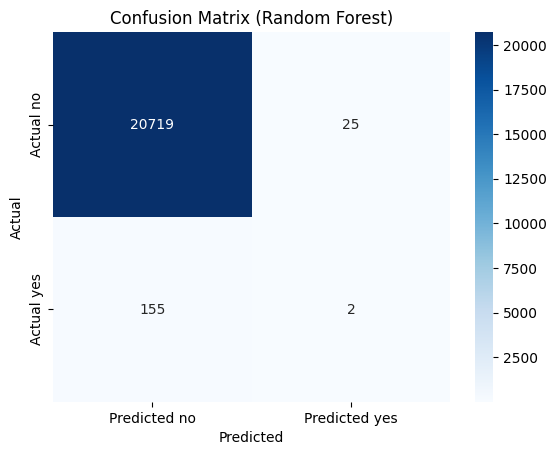

Model: XGBoost
F1 Score: 0.12631578947368421
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20744
           1       0.36      0.08      0.13       157

    accuracy                           0.99     20901
   macro avg       0.68      0.54      0.56     20901
weighted avg       0.99      0.99      0.99     20901

AUC Score: 0.8999026040220977


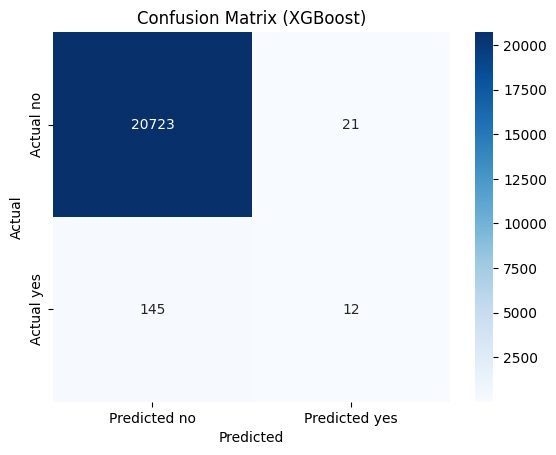

Model: Naive Bayes SMOTE
F1 Score: 0.06772673733804475
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     20744
           1       0.04      0.73      0.07       157

    accuracy                           0.85     20901
   macro avg       0.52      0.79      0.49     20901
weighted avg       0.99      0.85      0.91     20901

AUC Score: 0.8463386542897218


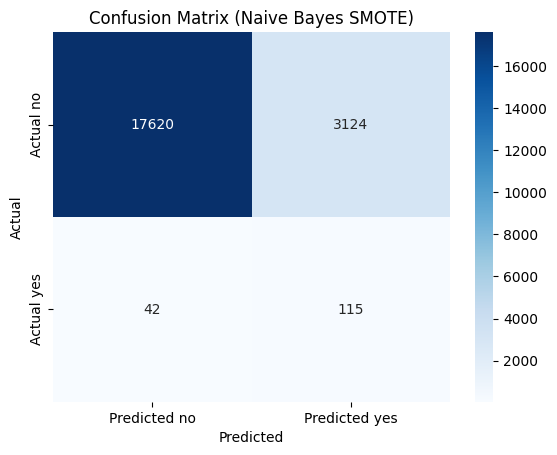

Model: Logistic Regression SMOTE
F1 Score: 0.07879564381806534
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     20744
           1       0.04      0.78      0.08       157

    accuracy                           0.86     20901
   macro avg       0.52      0.82      0.50     20901
weighted avg       0.99      0.86      0.92     20901

AUC Score: 0.9034609961655706


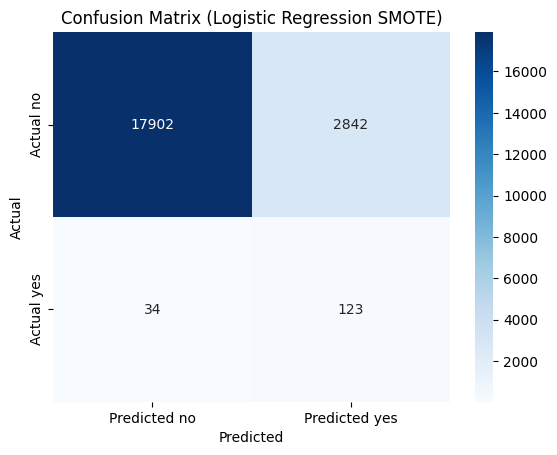

Model: Random Forest SMOTE
F1 Score: 0.08296943231441048
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20744
           1       0.06      0.12      0.08       157

    accuracy                           0.98     20901
   macro avg       0.53      0.55      0.54     20901
weighted avg       0.99      0.98      0.98     20901

AUC Score: 0.8063163379603587


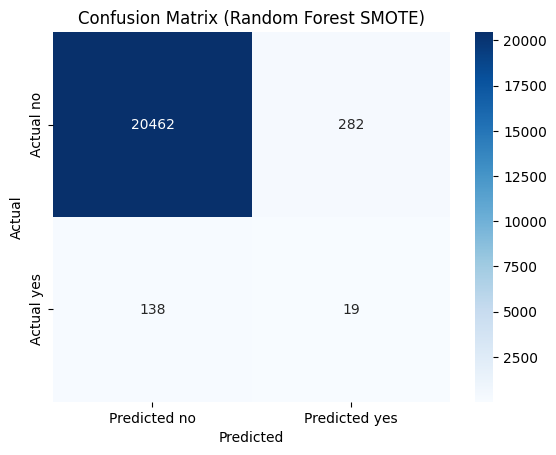

Model: XGBoost SMOTE
F1 Score: 0.08333333333333333
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     20744
           1       0.05      0.19      0.08       157

    accuracy                           0.97     20901
   macro avg       0.52      0.58      0.53     20901
weighted avg       0.99      0.97      0.98     20901

AUC Score: 0.7983467247685463


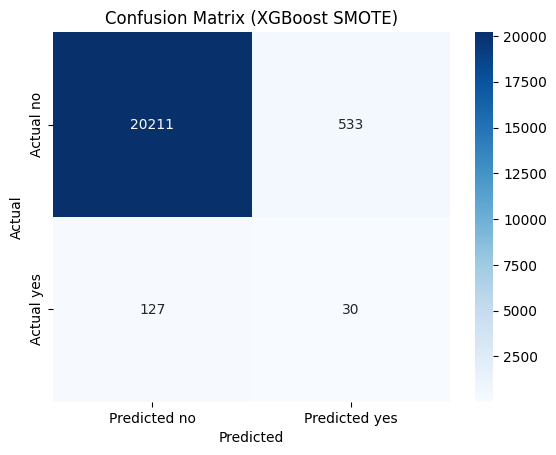

In [112]:
for model_name in simple_models:
    print(f"Model: {model_name}")
    y_pred = simple_models[model_name].predict(thirty_days_x_test)
    y_pred_proba = simple_models[model_name].predict_proba(thirty_days_x_test)[:, 1]

    print(f"F1 Score: {f1_score(thirty_days_y_test, y_pred)}")
    print(classification_report(thirty_days_y_test, y_pred))
    fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
    print(f"AUC Score: {auc(fpr, tpr)}")
    conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({model_name})')
    plt.show()

    prec, rec, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)
    model_evaluations[model_name] = {
        "fpr": fpr,
        "tpr": tpr,
        "precision": prec,
        "recall": rec
    }

## Neural Network Model
Using TensorFlow

### Non-SMOTE

In [113]:
model = Sequential()
model.add(Input((mortality_X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [114]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [115]:
model.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_191 (Dense)               │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history = model.fit(thirty_days_x_train, thirty_days_y_train, epochs=10, batch_size=32, validation_data=(thirty_days_x_test, thirty_days_y_test))

Epoch 1/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - auc: 0.5198 - f1_score: 0.0140 - loss: 0.0924 - val_auc: 0.8933 - val_f1_score: 0.0149 - val_loss: 0.0347
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.8692 - f1_score: 0.0144 - loss: 0.0323 - val_auc: 0.8634 - val_f1_score: 0.0149 - val_loss: 0.0334
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - auc: 0.8781 - f1_score: 0.0164 - loss: 0.0358 - val_auc: 0.8893 - val_f1_score: 0.0149 - val_loss: 0.0322
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.9000 - f1_score: 0.0155 - loss: 0.0321 - val_auc: 0.9105 - val_f1_score: 0.0149 - val_loss: 0.0312
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.9079 - f1_score: 0.0149 - loss: 0.0310 - val_auc: 0.9060 - val_f1_score: 0.0149 - val_loss: 0.0309
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - auc: 0.8882 - f1_score: 0.0147 - loss: 0.0308 - val_auc: 0.8712 - val_f1_score: 0.0149 - val_loss: 0.0317
Epoch 7/10
1524/

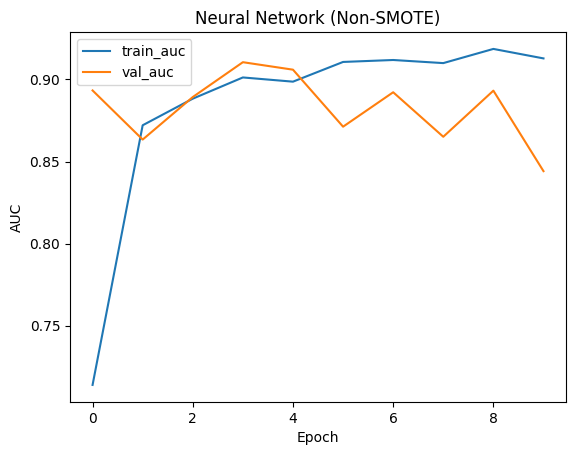

In [117]:
plt.title("Neural Network (Non-SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [118]:
y_pred_proba = model.predict(thirty_days_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step


In [119]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [120]:
f1_score(thirty_days_y_test, y_pred)

0.012578616352201259

In [121]:
fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
auc(fpr, tpr)

0.9330043404462284

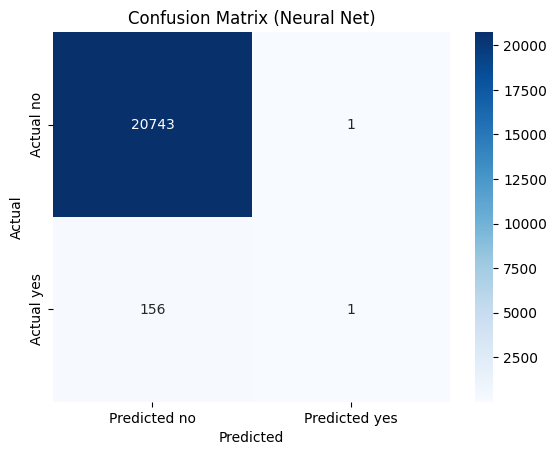

In [122]:
conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

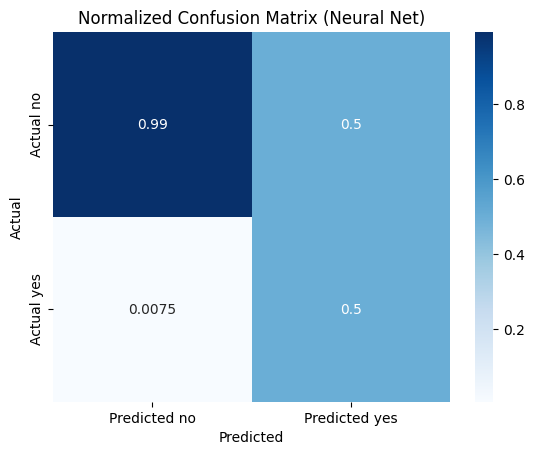

In [123]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [124]:
precision, recall, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)

In [125]:
model_evaluations["Neural Net"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

### SMOTE

In [126]:
model_smote = Sequential()
model_smote.add(Input((mortality_X.shape[1],)))
model_smote.add(Dense(64, activation='relu'))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [127]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [128]:
model_smote.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_194 (Dense)               │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
history = model_smote.fit(thirty_days_x_res, thirty_days_y_res, epochs=10, batch_size=32, validation_data=(thirty_days_x_test, thirty_days_y_test))

Epoch 1/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - auc: 0.9243 - f1_score: 0.6666 - loss: 0.3426 - val_auc: 0.8743 - val_f1_score: 0.0149 - val_loss: 0.2431
Epoch 2/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - auc: 0.9623 - f1_score: 0.6672 - loss: 0.2409 - val_auc: 0.8613 - val_f1_score: 0.0149 - val_loss: 0.2051
Epoch 3/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.9697 - f1_score: 0.6645 - loss: 0.2125 - val_auc: 0.8469 - val_f1_score: 0.0152 - val_loss: 0.2202
Epoch 4/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.9758 - f1_score: 0.6738 - loss: 0.1875 - val_auc: 0.8485 - val_f1_score: 0.0155 - val_loss: 0.2530
Epoch 5/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - auc: 0.9787 - f1_score: 0.6777 - loss: 0.1755 - val_auc: 0.8439 - val_f1_score: 0.0159 - val_loss: 0.2586
Epoch 6/10
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - auc: 0.9805 - f1_score: 0.6818 - loss: 0.1663 - val_auc: 0.8309 - val_f1_score: 0.0162 - val_loss: 0.1899
Epoch 7/10
3025/

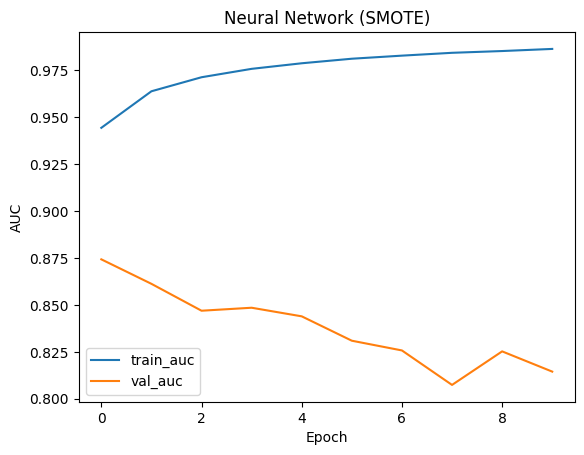

In [130]:
plt.title("Neural Network (SMOTE)")
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [131]:
y_pred_proba = model_smote.predict(thirty_days_x_test)

654/654 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step


In [132]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [133]:
f1_score(thirty_days_y_test, y_pred)

0.08689655172413793

In [134]:
fpr, tpr, _ = roc_curve(thirty_days_y_test, y_pred_proba)
auc(fpr, tpr)

0.8191717166010402

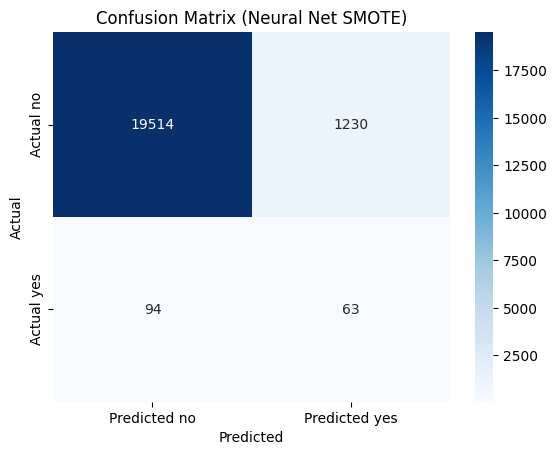

In [135]:
conf_mat = pd.DataFrame(confusion_matrix(thirty_days_y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

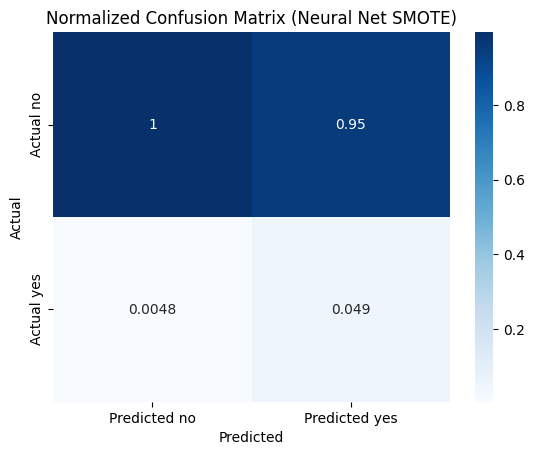

In [136]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [137]:
precision, recall, _ = precision_recall_curve(thirty_days_y_test, y_pred_proba)

In [138]:
model_evaluations["Neural Net SMOTE"] = {
    "fpr": fpr,
    "tpr": tpr,
    "precision": precision,
    "recall": recall
}

## Comparisons

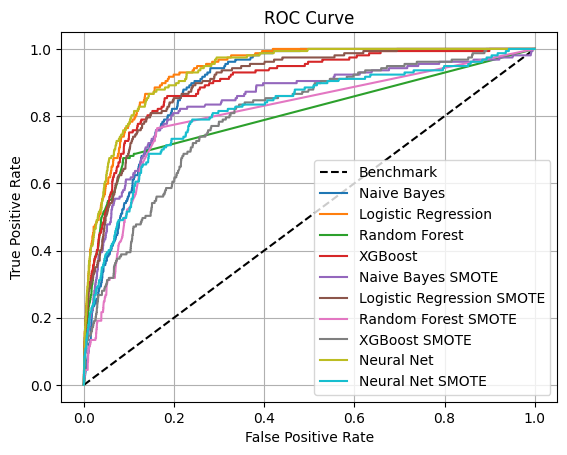

In [139]:
# ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Benchmark')

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['fpr'], model_evaluations[model_name]['tpr'], label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

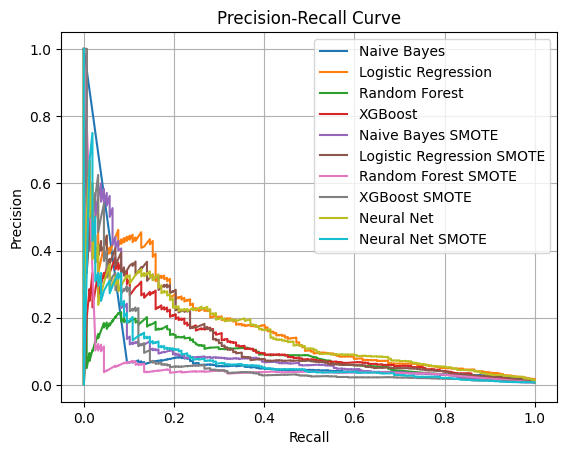

In [140]:
# Precision-Recall curve
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name]['recall'], model_evaluations[model_name]['precision'], label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()